In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import root

In [2]:
from kaye_et_al import calc_new_qv

In [197]:
def fun_dist_bvp(x, y, p):
    R = 1000
    qv = p[0]
    delta = y[0]
    gamma = y[1]
    ddelta = gamma
    dgam = -R*gamma*qv
    return np.vstack([ddelta, dgam])

In [198]:
def bc_dist_bvp(ya, yb, p):
    R = 1000
    qv = p[0]
    return np.array([ya[0], ya[1]-R, yb[0] - 1/qv])


In [199]:
eps=0.1
eff_A = 2.12e-3
qv_guess = eff_A**(2/3) * (2*eps)**(-4/3)
zeta = np.linspace(0, 1, 10)
y_arr = np.ones((2, zeta.shape[0]))/qv_guess

In [200]:
res_flow = solve_bvp(fun_dist_bvp, bc_dist_bvp, zeta, y_arr, p=[qv_guess], verbose=2, max_nodes=1e5)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.19e+00       1.21e-01          10             18       
       2          1.56e+00       1.78e-15          28             18       
       3          1.54e-01       4.11e-10          46             12       
       4          8.55e-03       1.07e-14          58             17       
       5          9.73e-04       1.75e-10          75              0       
Solved in 5 iterations, number of nodes 75. 
Maximum relative residual: 9.73e-04 
Maximum boundary residual: 1.75e-10


In [201]:
res_flow.p[0]

0.17951680545695967

In [202]:
x_flow_plot = np.linspace(0, 1, 100)
y_flow_plot = res_flow.sol(x_flow_plot)

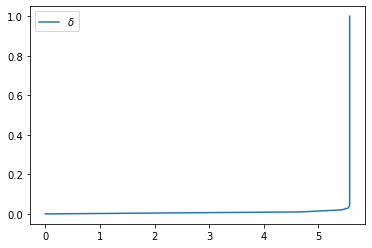

In [203]:
plt.plot(y_flow_plot[0], x_flow_plot, label="$\delta$")
plt.legend()

In [196]:
eps=0.1
eff_A = 2.12e-3
qv_check = calc_new_qv(y_flow_plot[0], x_flow_plot, eps, eff_A)
qv_check

0.013122426457983494